In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [27]:
df = pd.read_csv('/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA


Shape of dataset: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contrac

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


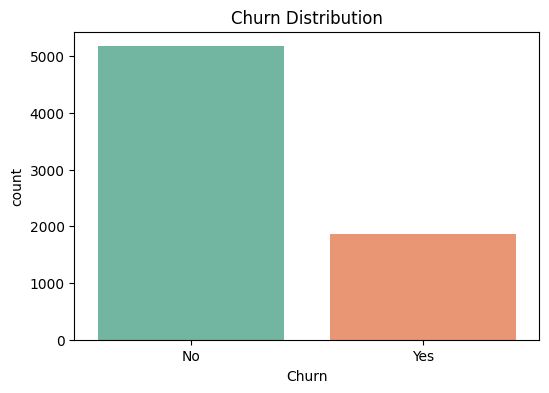

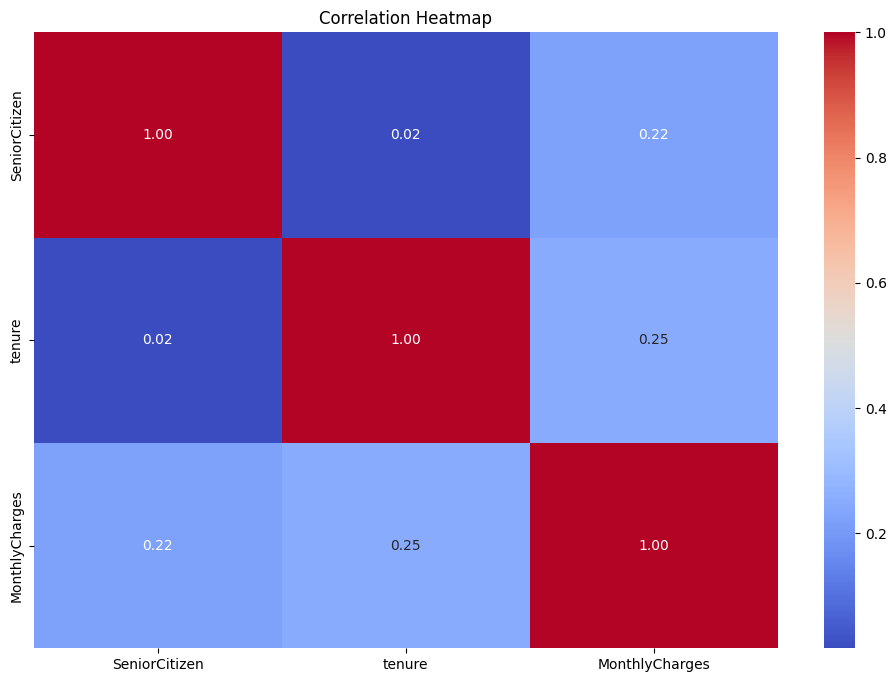

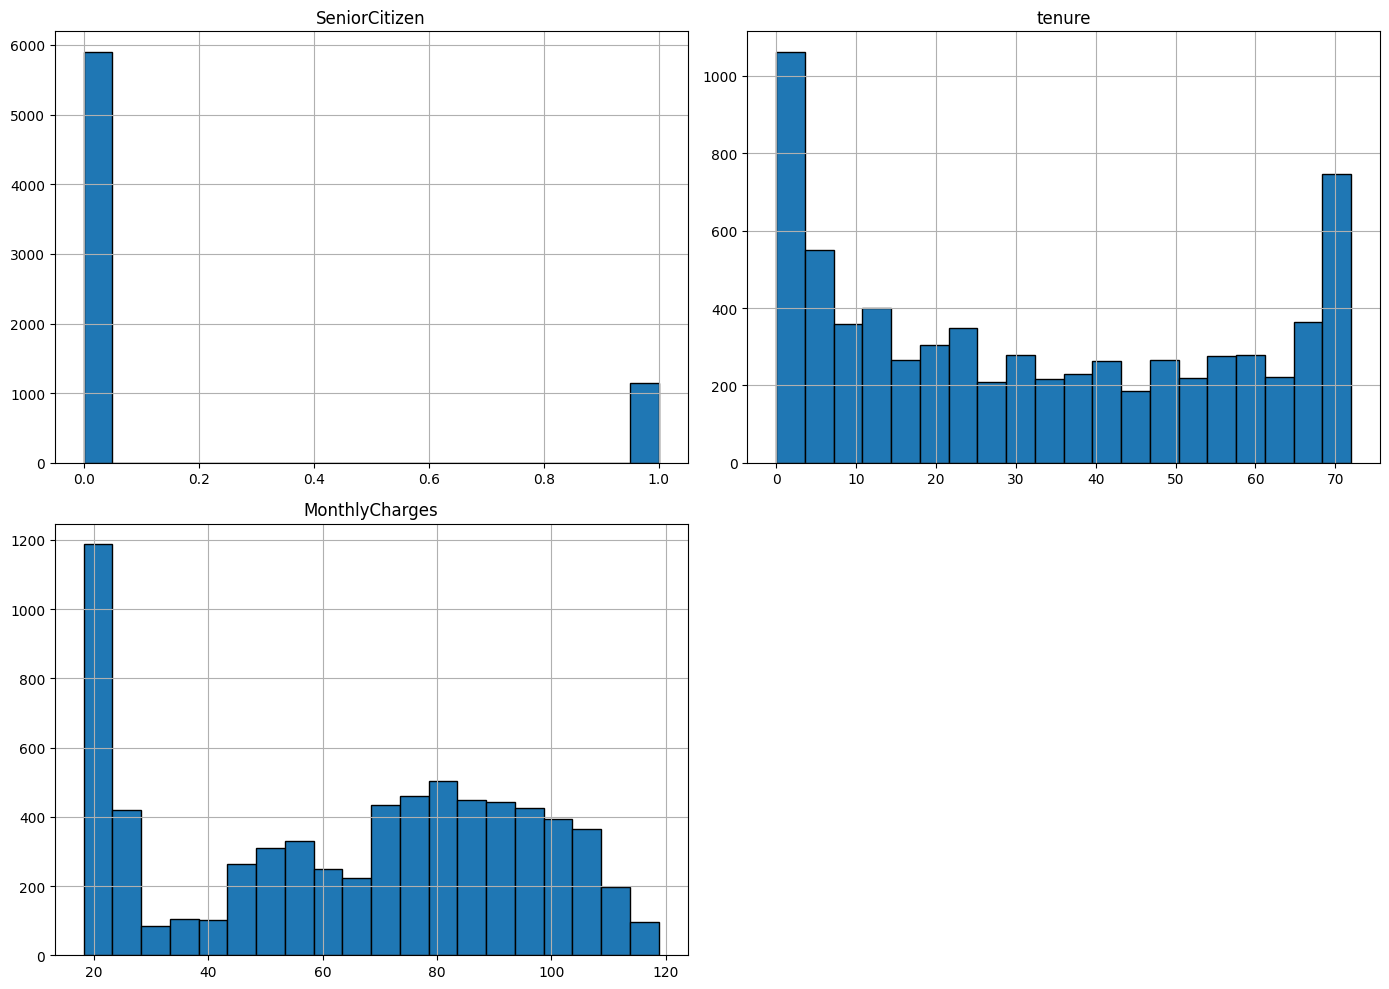

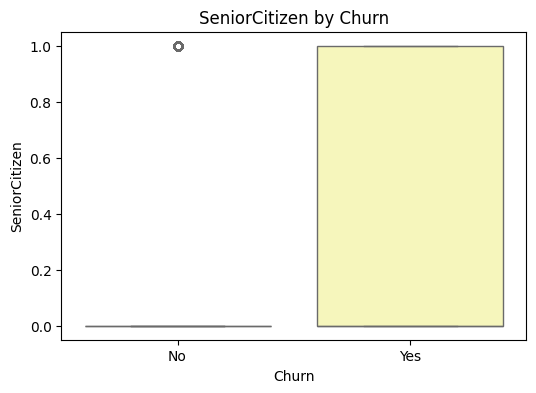

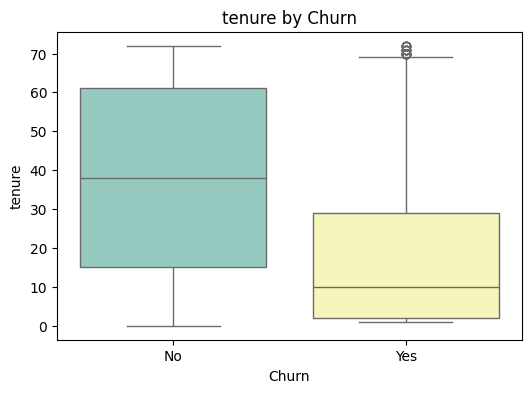

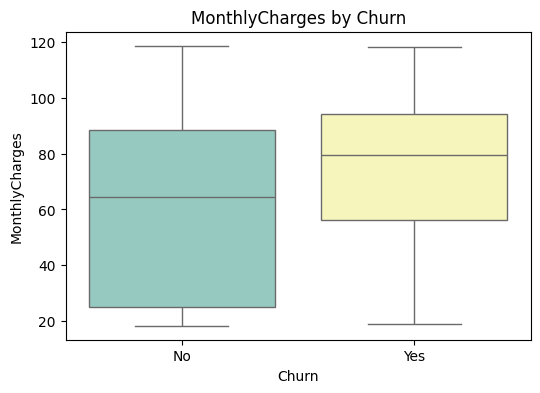

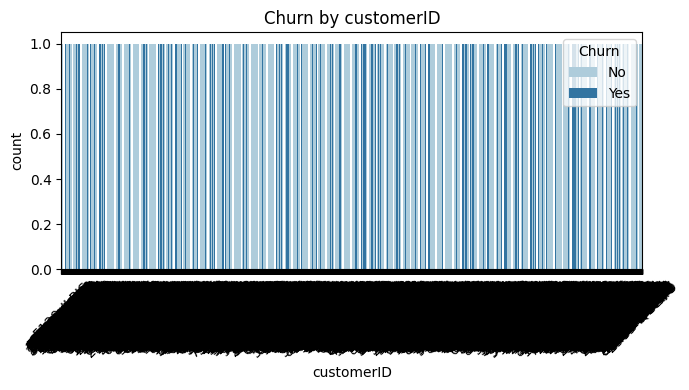

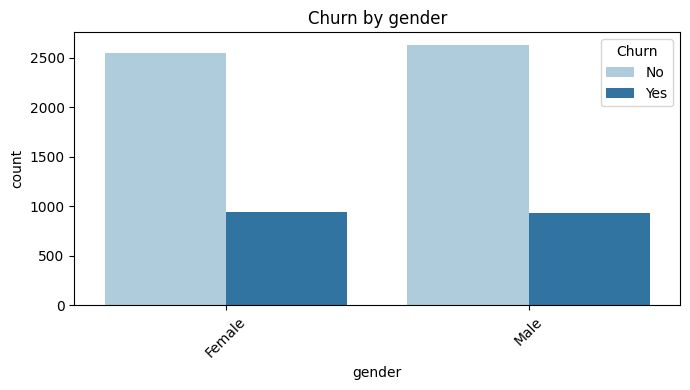

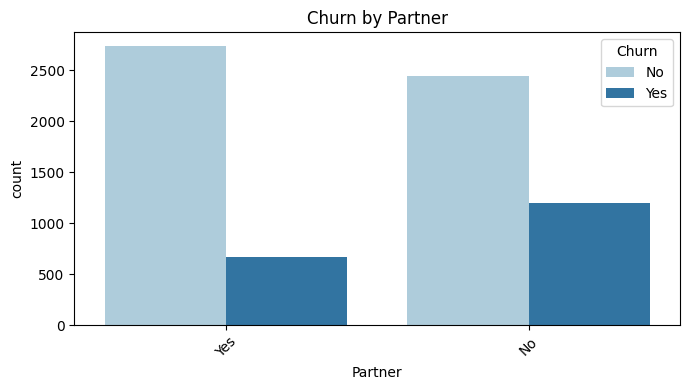

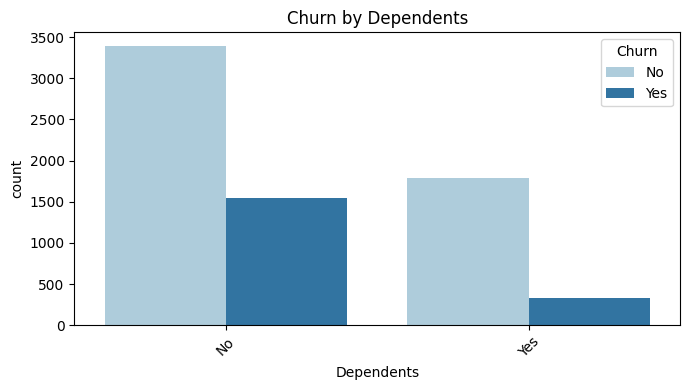

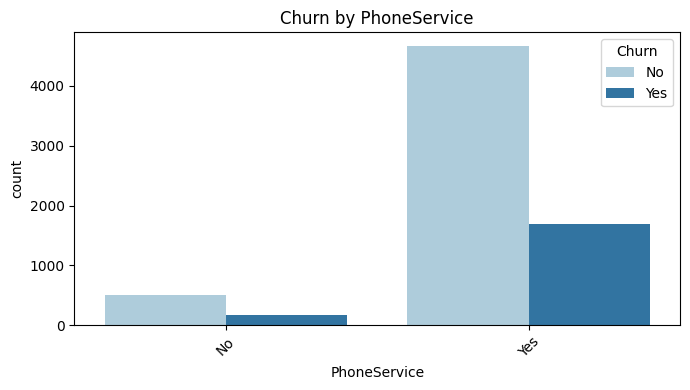

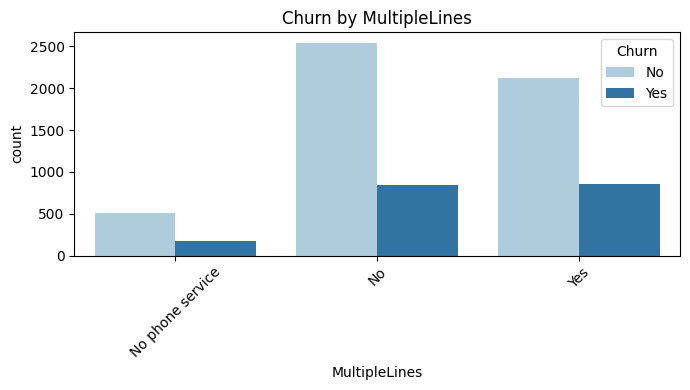

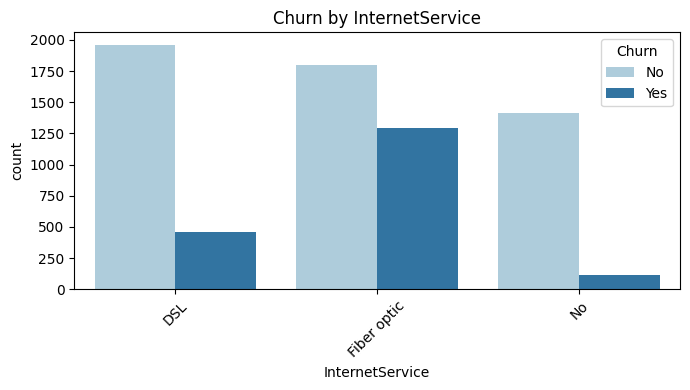

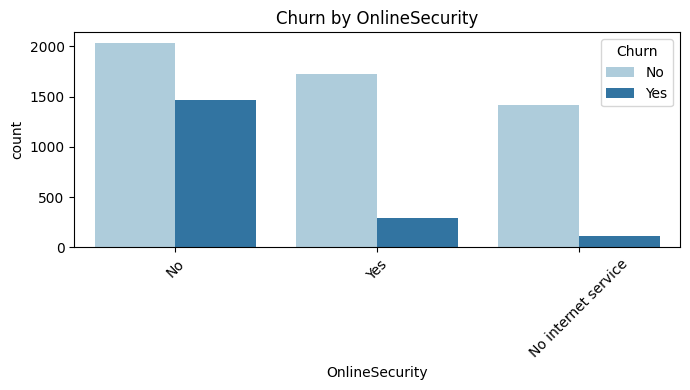

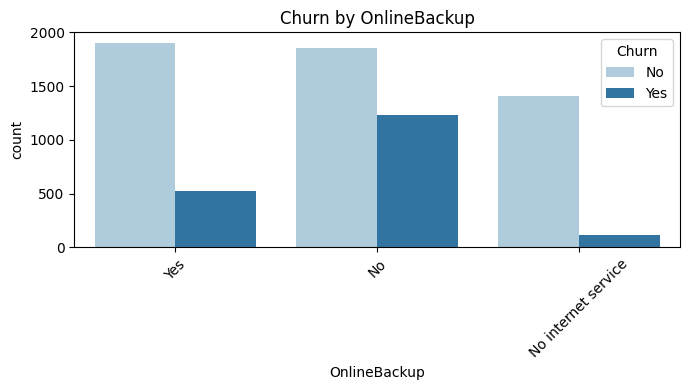

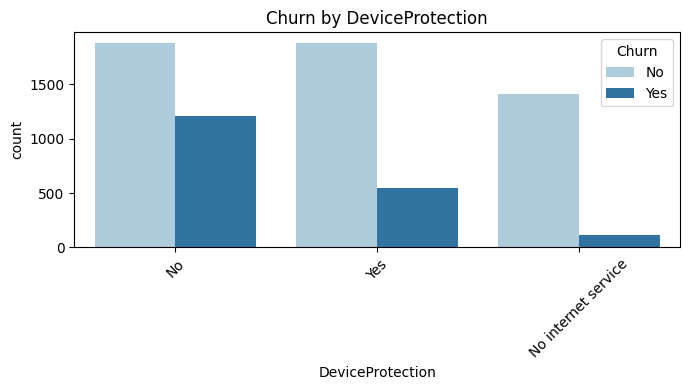

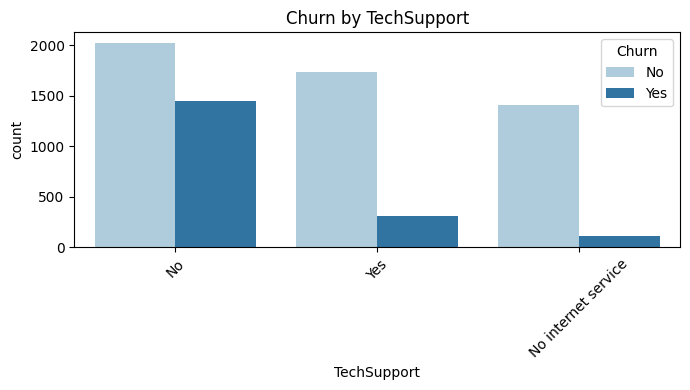

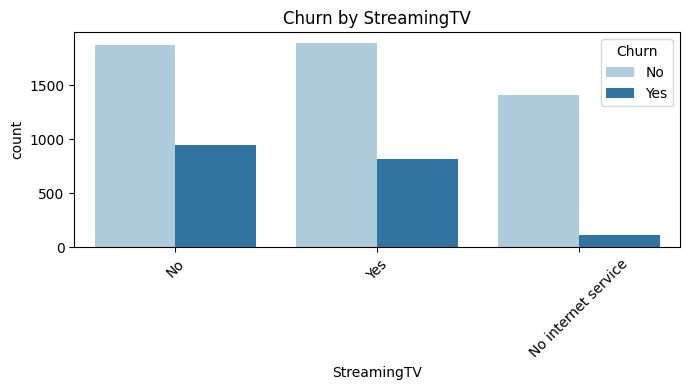

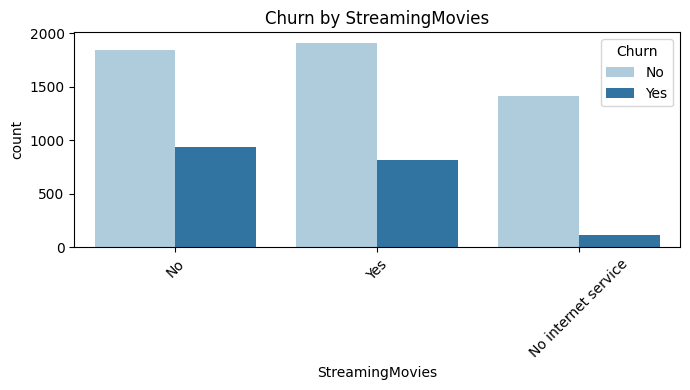

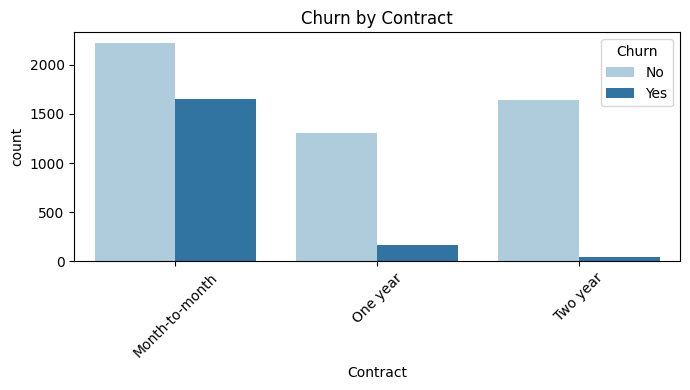

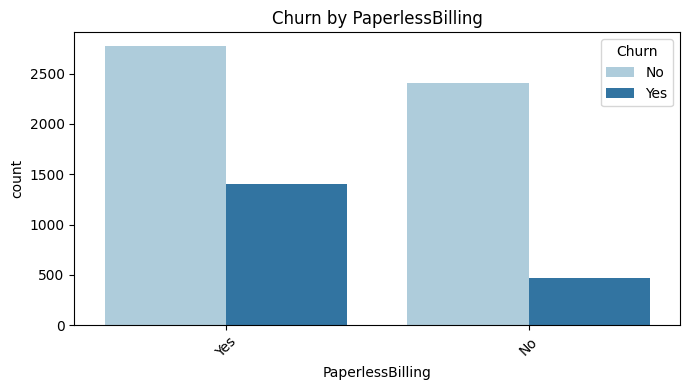

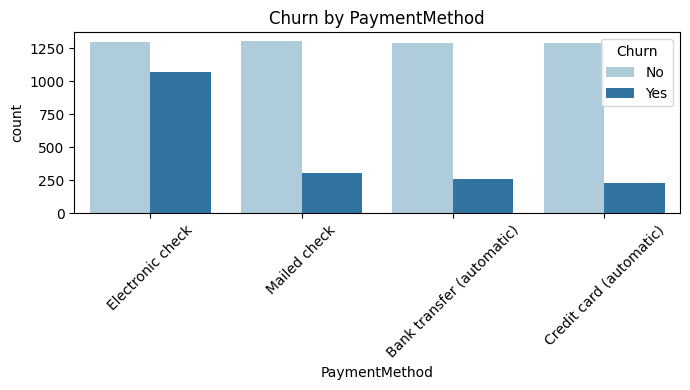

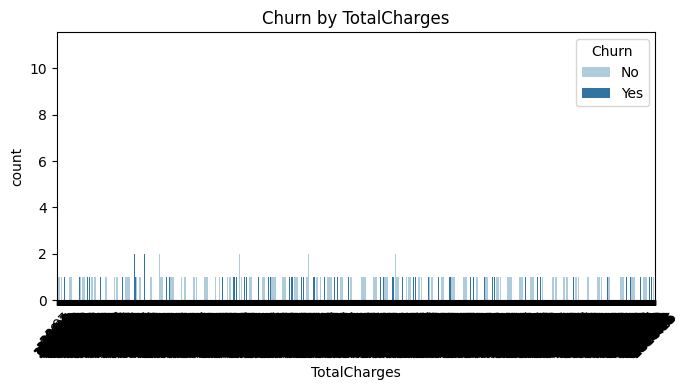

In [59]:
# Basic Overview
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Statistical Summary
display(df.describe(include='all'))

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()

# Correlation Heatmap (only numeric features)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Numerical Features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots for Numerical Features by Churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set3')
    plt.title(f"{col} by Churn")
    plt.show()

# Count plots for Categorical Features
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # Already plotted separately

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Paired')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Data preprocessing


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df1 = df[['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df1.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,29.85,29.85,No
1,Male,0,34,56.95,1889.5,No
2,Male,0,2,53.85,108.15,Yes
3,Male,0,45,42.30,1840.75,No
4,Female,0,2,70.70,151.65,Yes


In [31]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0


# dtype

In [32]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   SeniorCitizen   7043 non-null   int64  
 2   tenure          7043 non-null   int64  
 3   MonthlyCharges  7043 non-null   float64
 4   TotalCharges    7032 non-null   float64
 5   Churn           7043 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 330.3+ KB


# Outlier detection

In [33]:
def outlier_removal(dataframe, column):
    lower_limit = dataframe[column].quantile(0.25) - 1.5 * (dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25))
    upper_limit = dataframe[column].quantile(0.75) + 1.5 * (dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25))
    return dataframe[(dataframe[column] >= lower_limit) & (dataframe[column] <= upper_limit)]

# Apply only to numeric columns
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_cols:
    df1 = outlier_removal(df1, column)


<Axes: >

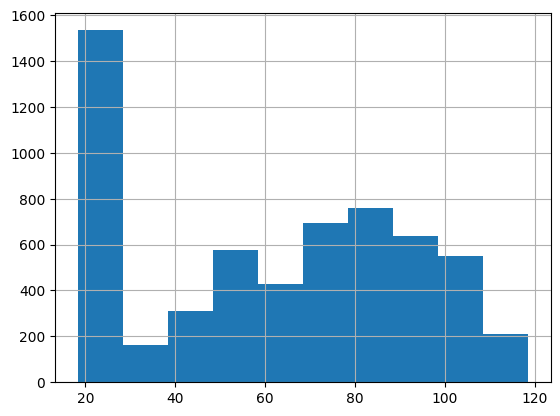

In [34]:
df1['MonthlyCharges'].hist()

<Axes: >

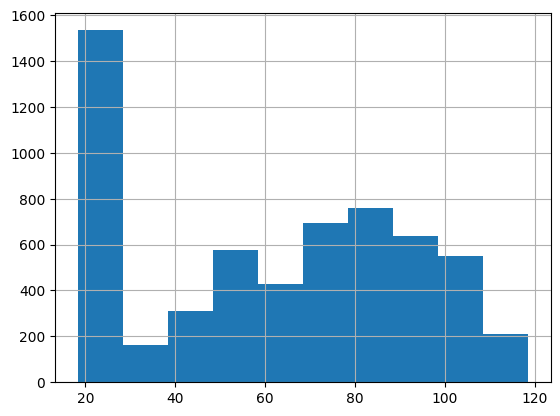

In [35]:
df1['MonthlyCharges'].hist()

# Encoding

In [36]:
df1['Male'] = pd.get_dummies(df['gender'], drop_first=True)
df1.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male
0,Female,0,1,29.85,29.85,No,False
1,Male,0,34,56.95,1889.50,No,True
2,Male,0,2,53.85,108.15,Yes,True
3,Male,0,45,42.30,1840.75,No,True
4,Female,0,2,70.70,151.65,Yes,False


In [37]:
df1.drop('gender', axis=1, inplace=True)
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male
0,0,1,29.85,29.85,No,False
1,0,34,56.95,1889.50,No,True
2,0,2,53.85,108.15,Yes,True
3,0,45,42.30,1840.75,No,True
4,0,2,70.70,151.65,Yes,False


In [38]:
df1['Churn'] = df1['Churn'].map({'Yes': 1, 'No': 0})
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male
0,0,1,29.85,29.85,0,False
1,0,34,56.95,1889.50,0,True
2,0,2,53.85,108.15,1,True
3,0,45,42.30,1840.75,0,True
4,0,2,70.70,151.65,1,False


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5871 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   5871 non-null   int64  
 1   tenure          5871 non-null   int64  
 2   MonthlyCharges  5871 non-null   float64
 3   TotalCharges    5871 non-null   float64
 4   Churn           5871 non-null   int64  
 5   Male            5871 non-null   bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 280.9 KB


# Scaling

In [40]:
scaler =StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = scaler.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = scaler.fit_transform(df1[['TotalCharges']])

# why fit_transform, not just fit or just transform

In [41]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Male
0,0,-1.267974,-1.054853,-0.965296,0,False
1,0,0.076427,-0.157572,-0.122818,0,True
2,0,-1.227235,-0.260213,-0.929824,1,True
3,0,0.524561,-0.642633,-0.144903,0,True
4,0,-1.227235,0.297691,-0.910117,1,False


# Feature Engineering

<Axes: >

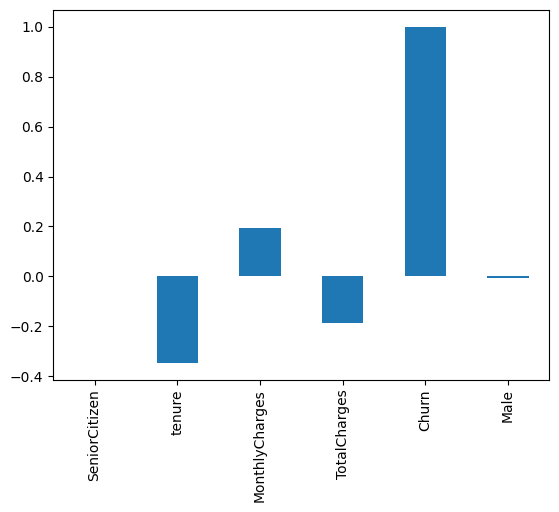

In [42]:
df1.corrwith(df1['Churn']).plot(kind='bar')

In [43]:
# nulls in X
df1.info()
df1.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5871 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   5871 non-null   int64  
 1   tenure          5871 non-null   float64
 2   MonthlyCharges  5871 non-null   float64
 3   TotalCharges    5871 non-null   float64
 4   Churn           5871 non-null   int64  
 5   Male            5871 non-null   bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 280.9 KB


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5871 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   5871 non-null   int64  
 1   tenure          5871 non-null   float64
 2   MonthlyCharges  5871 non-null   float64
 3   TotalCharges    5871 non-null   float64
 4   Churn           5871 non-null   int64  
 5   Male            5871 non-null   bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 280.9 KB


In [45]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Male'],
      dtype='object')

# data splitting

In [46]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [48]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

In [49]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
lr_model.score(X_test, y_test)

0.814468085106383

In [51]:
dt_model.score(X_test, y_test)

0.7506382978723404

In [52]:
rf_model.score(X_test, y_test)

0.7906382978723404

# Cross Validation

In [53]:
# copy paste code from previous class
# k fold cross_val_score =

cv_scores_lr = cross_val_score(lr_model, X, y, cv=5)
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

print("Logistic Regression CV Accuracy:", cv_scores_lr.mean())
print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())


Logistic Regression CV Accuracy: 0.8082081989198594
Decision Tree CV Accuracy: 0.7363310014860994
Random Forest CV Accuracy: 0.7812974736307948


# RandomizedSearchCV

In [54]:

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}


# Final Model Evaluation

In [55]:
y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8085106382978723
Confusion Matrix:
 [[842  51]
 [174 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       893
           1       0.68      0.38      0.49       282

    accuracy                           0.81      1175
   macro avg       0.75      0.66      0.69      1175
weighted avg       0.79      0.81      0.79      1175



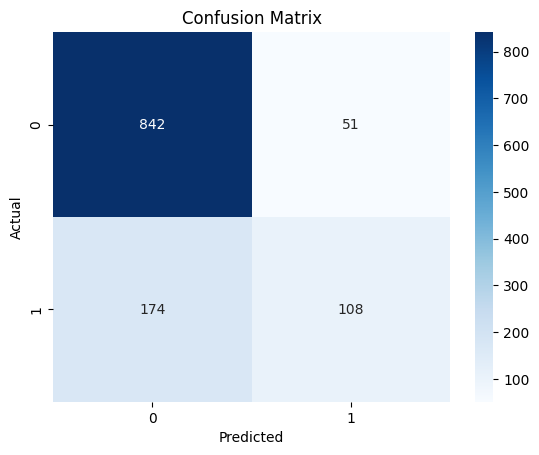

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [57]:
pip install gradio


In [58]:
import gradio as gr

def predict_churn(gender, senior, tenure, monthly, total):
    male = 1 if gender == "Male" else 0
    input_data = pd.DataFrame({
        'SeniorCitizen': [int(senior)],
        'tenure': scaler.transform([[tenure]])[0],
        'MonthlyCharges': scaler.transform([[monthly]])[0],
        'TotalCharges': scaler.transform([[total]])[0],
        'Male': [male]
    })

    pred = best_rf_model.predict(input_data)[0]
    return "Yes (Churned)" if pred == 1 else "No (Not Churned)"

interface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Radio(["0", "1"], label="Senior Citizen (0=No, 1=Yes)"),
        gr.Slider(0, 72, label="Tenure (in months)"),
        gr.Slider(0, 200, label="Monthly Charges"),
        gr.Slider(0, 10000, label="Total Charges")
    ],
    outputs="text",
    title="Telco Customer Churn Predictor"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2f5558fc5faa400991.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
